# **Breast Cancer Detection using Machine Learning: Random Forest Classifier**

# **1. Importing Key Libraries**

In [ ]:
# Importing Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# **2. Loading and Cleaning the Dataset**

In [ ]:
# Load the dataset (replace with actual dataset path if needed)
df = pd.read_csv("cancer_detection_dataset.csv")

# Check column names and clean if necessary
print("Columns in the dataset:", df.columns)
df.columns = df.columns.str.strip()  # Strip spaces from column names

# Display the first few rows of the dataset
print(df.head())

# Rename the columns for better clarity
df.columns = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
              'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points',
              'mean_symmetry', 'mean_fractal_dimension', 'radius_error', 'texture_error',
              'perimeter_error', 'area_error', 'smoothness_error', 'compactness_error',
              'concavity_error', 'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
              'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
              'fractal_dimension_se']


Columns in the dataset: Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')
     842302  M  17.99  10.38   122.8    1001   0.1184   0.2776  0.3001  \
0    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
1  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
2  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
3  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   
4    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578   

    0.1471  ...  25.38  17.33   184.6    2019  0.1622  0.6656  0.7119  0.2654  \
0  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   


# **3. Data Preprocessing**

In [ ]:
# Data Preprocessing
df = df.dropna()  # Drop rows with missing values

# Encoding 'diagnosis' column (M = malignant, B = benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop irrelevant columns (like 'id')
df = df.drop(columns=['id'])

# Descriptive Statistics
print(df.describe())


        diagnosis  mean_radius  mean_texture  mean_perimeter    mean_area  \
count  568.000000   568.000000    568.000000      568.000000   568.000000   
mean     0.371479    14.120491     19.305335       91.914754   654.279754   
std      0.483626     3.523416      4.288506       24.285848   351.923751   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.697500     16.177500       75.135000   420.175000   
50%      0.000000    13.355000     18.855000       86.210000   548.750000   
75%      1.000000    15.780000     21.802500      103.875000   782.625000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
count       568.000000        568.000000      568.000000           568.000000   
mean          0.096321          0.104036        0.088427             0.048746   
std           0.014046          0.052355        0.079294       

# **4. Data Visualization**

<ipython-input-8-f6fbb48dcb2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette="Set2")


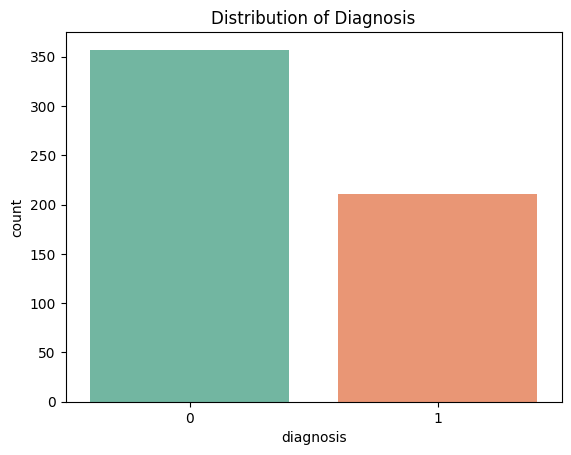

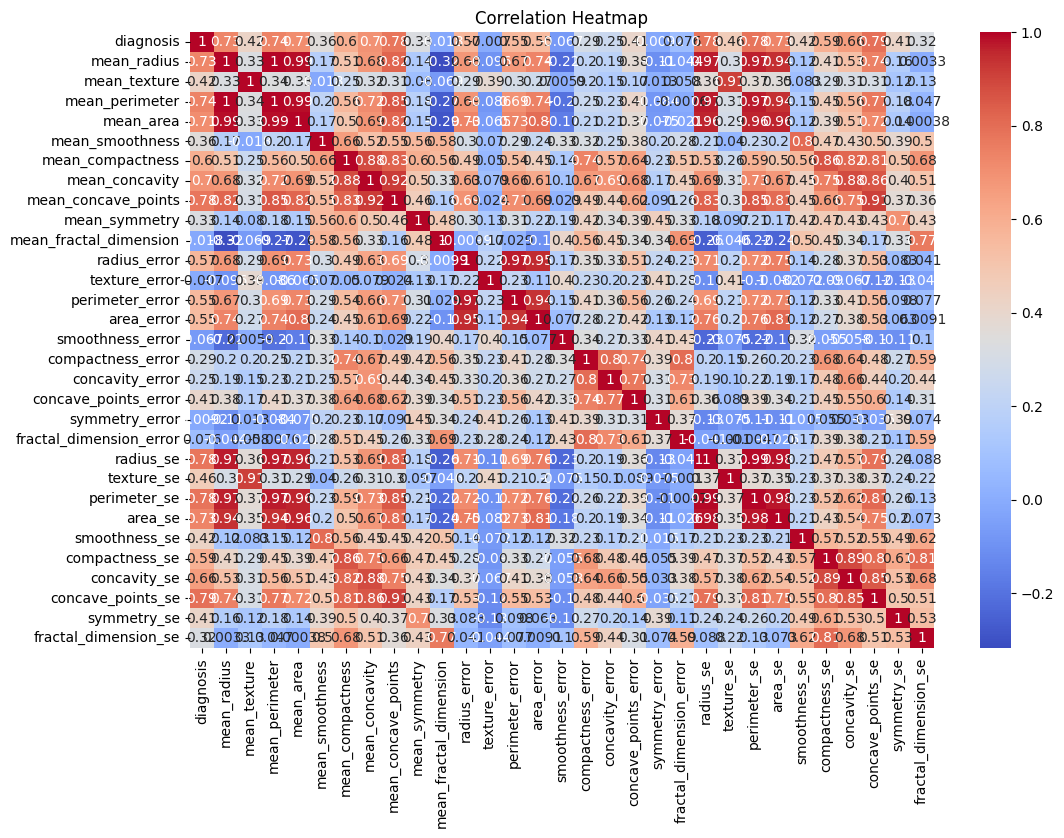

In [ ]:
# Visualizing the Distribution of Diagnosis (Malignant vs Benign)
sns.countplot(data=df, x='diagnosis', palette="Set2")
plt.title("Distribution of Diagnosis")
plt.show()

# Correlation heatmap to check for multicollinearity
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# **5. Splitting Data into Training and Testing Sets**

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **6. Feature Scaling**

In [ ]:
# Standardizing the features (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **7. Model Creation and Training**

In [ ]:
# Model Creation (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **8. Model Evaluation**

Accuracy: 97.37%


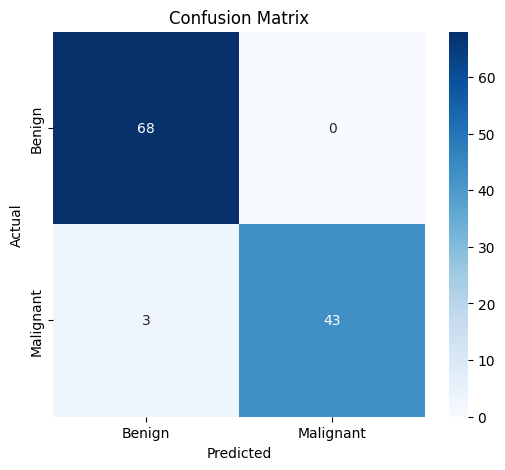

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        68
           1       1.00      0.93      0.97        46

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# **9. Feature Importance Visualization**

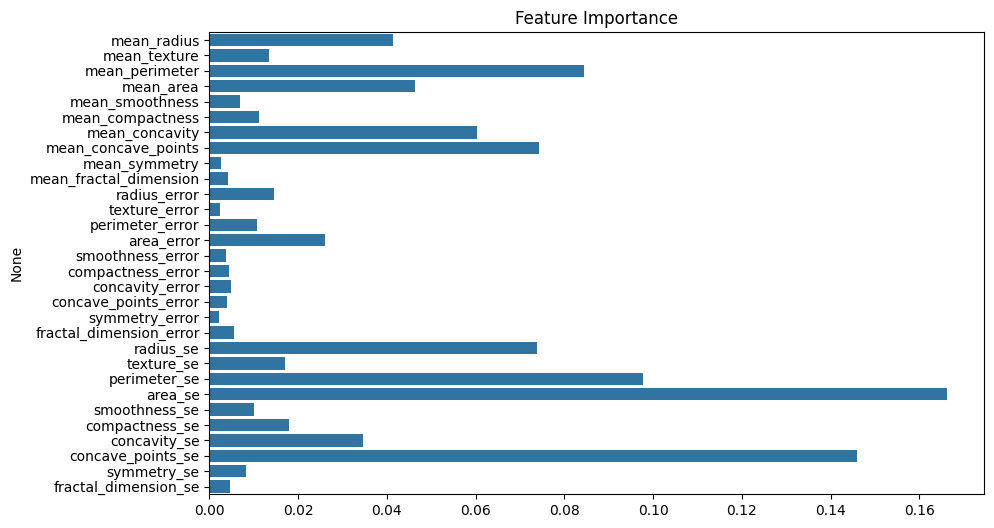

In [ ]:
# Feature Importance (for Random Forest)
feature_importances = model.feature_importances_
features = X.columns

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.show()


# **10. Saving the Model**

In [ ]:

# Saving the model
import joblib
joblib.dump(model, 'cancer_detection_model.pkl')



['cancer_detection_model.pkl']

# **11. Loading the Model and Making Predictions**

In [1]:
# Load the model and make predictions (example)
loaded_model = joblib.load('cancer_detection_model.pkl')
example = X_test[0].reshape(1, -1)
pred = loaded_model.predict(example)
print(f"Prediction for the first test sample: {'Malignant' if pred[0] == 1 else 'Benign'}")


NameError: name 'joblib' is not defined